# API

We use this notebook to explain APIs. Let's say we want to download the Baldurs_Gate_3 page https://en.wikipedia.org/wiki/Baldur%27s_Gate_3

In [64]:
import json
import urllib.request
import matplotlib.pyplot as plt

In [4]:
#html
url = 'https://en.wikipedia.org/wiki/Baldur%27s_Gate_3'
response = urllib.request.urlopen(url)
data = response.read()
text = data.decode('utf-8')

Now, use the API to get the page in a format we like

https://en.wikipedia.org/w/api.php?action=query&titles=Rembrandt&prop=revisions&rvprop=content&format=json

In [5]:
# Wiki source
baseurl =  "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=Baldur%27s_Gate_3"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
wikiresponse = urllib.request.urlopen(query)
wikidata = wikiresponse.read()
wikitext = wikidata.decode('utf-8')
wikijson = json.loads(wikitext)


#### What is the the difference between the html page and the wiki-source?
Compare with the html, the wiki-source will be much simpler and readable however with less functions

##### What are the various parameters you can set for a query of the wikipedia api?
- **`title`**: The title you want to query.
- **`content`**: The parameter is used to retrieve the actual text content of a Wikipedia page as it existed at the time of the revision.
- **`dataformat`**: The format of the data.


In [6]:
print(query)
print(wikijson)

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Baldur%27s_Gate_3&format=json
{'batchcomplete': '', 'warnings': {'main': {'*': 'Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application.'}, 'revisions': {'*': 'Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used.'}}, 'query': {'normalized': [{'from': "Baldur's_Gate_3", 'to': "Baldur's Gate 3"}], 'pages': {'60979422': {'pageid': 60979422, 'ns': 0, 'title': "Baldur's Gate 3", 'revisions': [{'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': '{{Short description|2023 video game}}\n{{about|the 2023 video game|the cancelled video game|Baldur\'s Gate III: The

In [7]:
print(wikijson['query'])

{'normalized': [{'from': "Baldur's_Gate_3", 'to': "Baldur's Gate 3"}], 'pages': {'60979422': {'pageid': 60979422, 'ns': 0, 'title': "Baldur's Gate 3", 'revisions': [{'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': '{{Short description|2023 video game}}\n{{about|the 2023 video game|the cancelled video game|Baldur\'s Gate III: The Black Hound{{!}}\'\'Baldur\'s Gate III: The Black Hound\'\'}}\n{{Use British English|date=October 2023}}\n{{Use dmy dates|date=August 2024}}\n{{Infobox video game\n| title      = Baldur\'s Gate 3\n| image      = Baldur\'s Gate 3 cover art.jpg\n| developer  = [[Larian Studios]]\n| publisher  = {{Unbulleted list|Larian Studios|\'\'\'PlayStation 5\'\'\'|[[Japan|JP]]: [[Spike Chunsoft]]}}\n| director   = [[Swen Vincke]]\n| producer   = David Walgrave\n| programmer = {{ubl|Bert Van Semmertier|Blake Maltby}}\n| artist     = Joachim Vleminckx\n| writer     = Adam Smith\n| composer   = [[Borislav Slavov]]\n| series     = \'\'[[Baldur\'s Gate]]\'\'\n| e

In [8]:
def wikiinfo(title):
    baseurl =  "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = urllib.parse.urlencode({'titles': title})
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikijson = json.loads(wikitext)
    print(wikijson)
wikiinfo(title="Baldur%27s_Gate_3")

{'batchcomplete': '', 'query': {'pages': {'-1': {'title': 'Baldur%27s_Gate_3', 'invalidreason': 'The requested page title contains invalid characters: "%27".', 'invalid': ''}}}}


## NetworkX
Tutorials:https://networkx.org/documentation/stable/tutorial.html

In [9]:
import networkx as nx

In [10]:
G= nx.Graph()
'''
garph is a collection of the nodes along with identified paris of nodes with
identified paris of nodes (edges link etc), The node of Networkx could be any
hashable obejct besides none
'''

'\ngarph is a collection of the nodes along with identified paris of nodes with\nidentified paris of nodes (edges link etc), The node of Networkx could be any\nhashable obejct besides none\n'

#### G grow

In [11]:
G.add_node(1) #Graph with 1 nodes and 0 edges
G.add_nodes_from([2, 3]) #list, Graph with 2 nodes and 0 edges
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})]) #truple

In [12]:
#Nodes from one graph can be incorporated into another
H = nx.path_graph(10)
G.add_nodes_from(H) # G contains the nodes of H as nodes of G(the nodes of H add)
G.add_node(H) # G contains H as a node(1 node add)This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more.

#####Edges

In [13]:
G.add_edge(1, 2) #G can also be grown by adding one edge at a time, Graph with 2 nodes and 1 edges
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple* Graph with 2 nodes and 1 edges

In [14]:
G.add_edges_from([(1, 2), (1, 3)]) #Graph with 3 nodes and 2 edges

In [15]:
G.add_edges_from(H.edges) # add from other graph

In [16]:
# There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges
G.clear()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2) #(1,2) existing
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
print(G)

Graph with 8 nodes and 3 edges


In [17]:
"""
The order of adjacency reporting (e.g., G.adj, G.successors(后继节点)(Returns an iterator
over successor nodes of n. A successor of n is a node m such that there exists a
directed edge from n to m.), G.predecessors(前继节点)) is the order of edge addition.
However, the order of G.edges is the order of the adjacencies which includes both
the order of the nodes and each node’s adjacencies. See example below:
"""
"""
In a directed graph, a successor of a node is any node that can be reached by
following a directed edge from that node.
In a directed graph, a predecessor of a node is any node that has a directed
edge pointing to the node in question.

"""
"""
The assert statement is a debugging aid that
tests a condition and raises an AssertionError
if the condition is not true.
"""
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

####Examining elements of a graph

In [18]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [19]:
"""
One can specify to report the edges and degree from a subset of all nodes
using an nbunch.
"""
print(G.edges([2, 'm'])) #the edge of 2 and edge of m
print(G.edges([2, 3])) #the edge of 2 and edge of 3
print(G.degree([2, 3])) #the degree of 2 and degree of m

[(2, 1), ('m', 3)]
[(2, 1), (3, 1), (3, 'm')]
[(2, 1), (3, 2)]


####Removing elements from a graph

In [20]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 3)
print(list(G))

[1, 3, 'spam']
[1, 3, 'spam']


####Using the graph constructors

In [21]:
"""
Graph objects do not have to be built up incrementally - data specifying graph
structure can be passed directly to the constructors of the various graph classes.
When creating a graph structure by instantiating one of the graph classes you can
specify data in several formats.
"""
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
print(list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
print(list(H.edges()))
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
print(list(H.edges()))


[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]
[(0, 1), (0, 2), (1, 2)]


####What to use as nodes and edges

In [27]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])  # same as G.adj[1]
print(G[1][2]) # prints the data associated with the edge between nodes 1 and 2
print(G.edges[1,2]) # prints the data associated with the edge between nodes 1 and 2

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}


In [28]:
"""
You can get/set the attributes of an edge using subscript notation
if the edge already exists.
G[1][3] = G.egdes[1,3]
"""
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [33]:
"""
Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(),
or G.adj.items(). Note that for undirected graphs,adjacency iteration
sees each edge twice.
"""
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

#convient way
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


####Adding attributes to graphs, nodes, and edges

In [37]:
#Graph Attributes
G = nx.Graph(day="Friday")
print(G.graph)
G.graph['day'] = "Monday"
print(G.graph)

{'day': 'Monday'}

In [38]:
#Node Attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])
G.nodes[1]['room'] = 714
print(G.nodes.data())

{'time': '5pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


In [42]:
#Edge Attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
list(G.adj.items())

[(1, AtlasView({2: {'weight': 4.7, 'color': 'blue'}})),
 (3, AtlasView({4: {'color': 'red', 'weight': 4.2}, 2: {'weight': 8}})),
 (2, AtlasView({1: {'weight': 4.7, 'color': 'blue'}, 3: {'weight': 8}})),
 (4, AtlasView({3: {'color': 'red', 'weight': 4.2}, 5: {'color': 'red'}})),
 (5, AtlasView({4: {'color': 'red'}}))]

####Directed graphs

In [46]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight')) #returns the sum of the weights of the edges that go out from node 1.
print(DG.degree(1, weight='weight')) #returns the sum of both incoming and outgoing edges for node 1, weighted by the edge weights.
print(list(DG.successors(1))) # returns a list of nodes that have incoming edges from node 1.
print(list(DG.neighbors(1))) # returns the same result as successors

0.5
1.25
[2]
[2]


In [45]:
#convert directed graphs to undirected graph
G.to_undirected() #or
H = nx.Graph(G)

####Multigraphs

In [47]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [48]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

####Graph generators and graph operations

In [57]:
# 1. Classic Graph Operations
# These operations allow you to manipulate and combine graphs in various ways.

# a. Subgraph: Returns the subgraph induced on nodes in `nbunch`
G = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5)])
sub_G = nx.subgraph(G, [1, 2, 3])
# sub_G contains only nodes 1, 2, 3 and the edges between them.

# b. Union: Combine graphs G and H
H = nx.Graph([(4, 5), (5, 6)])
union_GH = nx.union(G, H, rename=('G_', 'H_'))
# union_GH contains all nodes and edges from both G and H.

# c. Disjoint Union: Combines G and H ensuring node names are distinct
disjoint_union_GH = nx.disjoint_union(G, H)
# Even if G and H share node names, disjoint_union_GH renames them to ensure distinctness.

# d. Cartesian Product: Combines graphs G and H by taking the Cartesian product of their node sets
cartesian_product_GH = nx.cartesian_product(G, H)
# Each node in the resulting graph is a tuple from nodes of G and H.

# e. Compose: Combines graphs G and H by overlaying their nodes and edges
compose_GH = nx.compose(G, H)
# Common nodes are merged, but their edges are combined.

# f. Complement: Returns the complement of a graph
complement_G = nx.complement(G)
# complement_G contains the same nodes but with edges between previously disconnected pairs.

# g. Create Empty Copy: Copies G but removes all edges
empty_G = nx.create_empty_copy(G)
# empty_G contains all nodes but no edges.

# h. Convert to Undirected: Converts a directed graph to undirected by ignoring edge directions
DG = nx.DiGraph([(1, 2), (2, 3)])
undirected_G = nx.to_undirected(DG)
# Converts a directed graph DG to an undirected graph.

# i. Convert to Directed: Converts an undirected graph to a directed graph by duplicating edges
directed_G = nx.to_directed(G)
# Converts an undirected graph G to a directed graph by adding directed edges.

# 2. Classic Small Graphs
# These predefined graphs represent famous graph structures.

# a. Petersen Graph: Returns the famous Petersen graph with 10 nodes and 15 edges
petersen_G = nx.petersen_graph()

# b. Tutte Graph: Returns the Tutte graph, a 3-regular undirected graph with 46 nodes
tutte_G = nx.tutte_graph()

# c. Sedgewick Maze Graph: Returns a small maze graph with cycles
sedgewick_maze_G = nx.sedgewick_maze_graph()

# d. Tetrahedral Graph: Returns the 3-regular Platonic Tetrahedral graph
tetrahedral_G = nx.tetrahedral_graph()

# 3. Constructive Generators for Classic Graphs
# These functions allow you to create various classic graph structures with custom sizes.

# a. Complete Graph: Returns the complete graph K_n where every node is connected to every other node
complete_G = nx.complete_graph(5)
# complete_G is the complete graph on 5 nodes.

# b. Complete Bipartite Graph: Returns the complete bipartite graph K_{n1,n2}
complete_bipartite_G = nx.complete_bipartite_graph(3, 4)
# complete_bipartite_G has two sets of nodes (3 and 4), with edges between all nodes from set 1 to set 2.

# c. Barbell Graph: Two complete graphs connected by a path
barbell_G = nx.barbell_graph(4, 2)
# Creates a barbell graph with two K_4 graphs connected by a path of length 2.

# d. Lollipop Graph: A complete graph K_m connected to a path P_n
lollipop_G = nx.lollipop_graph(3, 4)
# Creates a lollipop graph with a K_3 connected to a P_4.


In [58]:
# stochastic graph generator
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [59]:
# Reading a graph stored in a file using common graph formats
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

####Analyzing graphs

In [60]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [61]:
sorted(d for n, d in G.degree()) # sorting the degrees of all nodes

[0, 1, 1, 2]

In [62]:
nx.clustering(G) # calculates the clustering coefficient for the nodes in the graph G

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [ ]:
sp = dict(nx.all_pairs_shortest_path(G)) #computes the shortest paths between all pairs of nodes in the graph G
sp[3]

####Drawing Graphs

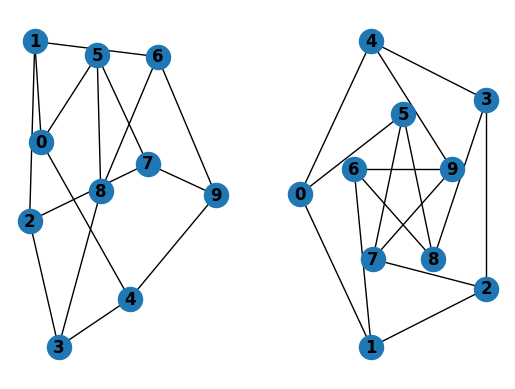

In [65]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

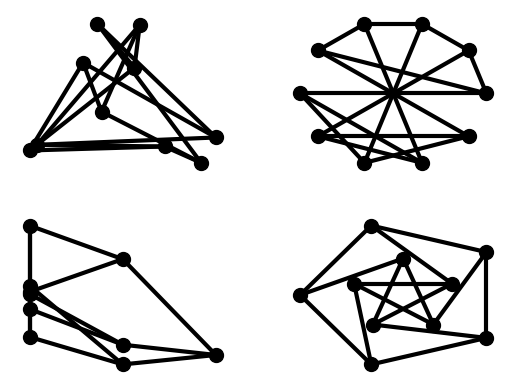

In [66]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

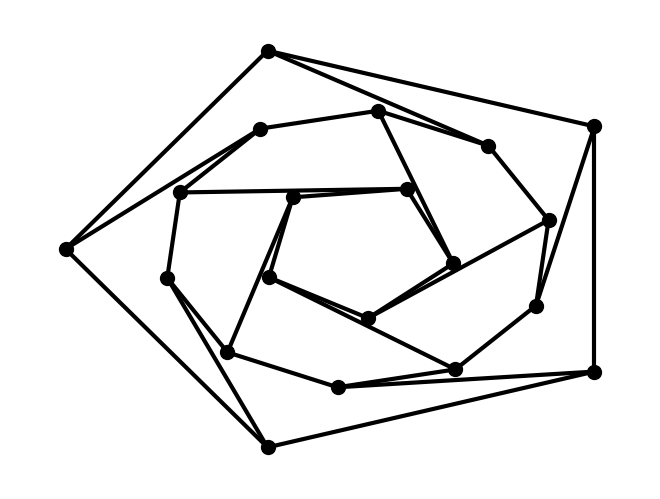

In [67]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)